In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_assurance = pd.read_csv("/content/drive/MyDrive/Projet Data/df_assurance.csv") #BDD de sinistres ou de contrats d’assurance
df_assurance.head()

,id_client,id_vehicle,id_policy,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,...,has_claim,DEP,temp_max_moy,temp_min_moy,temp_moyenne,precip_moy,LAT,LON,geo_cluster,Cluster
0,A00072644,V01,A00072644-V01,0.50,4.0,8.0,4.0,Monthly,No,WorkPrivate,...,1,71,18.434167,7.829583,13.131250,74.627917,46.616975,4.563550,1,NaN
1,A00036953,V01,A00036953-V01,0.50,4.0,11.0,1.0,Yearly,No,Retired,...,0,67,16.566667,7.609804,12.082353,76.372059,48.642510,7.515628,4,NaN
2,A00079066,V01,A00079066-V01,0.50,4.0,7.0,1.0,Yearly,No,Retired,...,0,69,18.421759,8.544907,13.482407,63.654630,45.888759,4.641306,1,NaN
3,A00018024,V01,A00018024-V01,0.64,3.0,5.0,1.0,Yearly,No,WorkPrivate,...,0,69,18.421759,8.544907,13.482407,63.654630,45.888759,4.641306,1,NaN
4,A00019276,V01,A00019276-V01,0.72,1.0,1.0,1.0,Monthly,No,WorkPrivate,...,0,19,17.624561,6.974123,12.301316,126.135088,45.346772,1.907281,2,NaN


## Encodage

In [ ]:
# Identifier les colonnes qualitatives (object ou category)
columns_objects = df_assurance.select_dtypes(include=['object', 'category']).columns

# Exclure les colonnes qui commencent par "id_" et "pol_insee_code"
qualitative_columns = [col for col in columns_objects if not col.startswith('id_') and col != 'pol_insee_code']

# Afficher les colonnes à encoder
print(qualitative_columns)

['pol_pay_freq', 'pol_payd', 'pol_usage', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel', 'vh_make', 'vh_model', 'vh_type']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
mappings = {}

# Pour chaque colonne qualitative on applique le LabelEncoder sauf drv_sex2
for col in qualitative_columns:
  if col != 'drv_sex2':
    df_assurance[col] = encoder.fit_transform(df_assurance[col])
    mappings[col] = {index: label for index, label in enumerate(encoder.classes_)}

# Remplacement manuel pour drv_sex2
sex2_mapping = {'F': 0, 'M': 1, 'Missing': -1}
df_assurance['drv_sex2'] = df_assurance['drv_sex2'].map(sex2_mapping)

# Ajouter au dictionnaire global des mappings
mappings['drv_sex2'] = {v: k for k, v in sex2_mapping.items()}


# Afficher les mappages pour vérification
for col, mapping in mappings.items():
  print(f"Mapping pour {col} : {mapping}")
df_assurance

Mapping pour pol_pay_freq : {0: 'Biannual', 1: 'Monthly', 2: 'Quarterly', 3: 'Yearly'}
Mapping pour pol_payd : {0: 'No', 1: 'Yes'}
Mapping pour pol_usage : {0: 'All', 1: 'AllTrips', 2: 'Priv', 3: 'Pro', 4: 'Professional', 5: 'Retired', 6: 'WorkPrivate'}
Mapping pour drv_drv2 : {0: 'No', 1: 'Yes'}
Mapping pour drv_sex1 : {0: 'F', 1: 'M'}
Mapping pour vh_fuel : {0: 'Diesel', 1: 'Gasoline', 2: 'Gazol', 3: 'Hybrid'}
Mapping pour vh_make : {0: 'ACL', 1: 'ALFA ROMEO', 2: 'ALPINE', 3: 'APAL', 4: 'ARO', 5: 'ASIA', 6: 'AUDI', 7: 'AUSTIN', 8: 'AUSTIN HEALEY', 9: 'AUTOBIANCHI', 10: 'AUVERLAND', 11: 'BABOULIN', 12: 'BEDFORD', 13: 'BENTLEY', 14: 'BERTONE', 15: 'BMW', 16: 'BREMACH', 17: 'BUICK', 18: 'CADILLAC', 19: 'CHEVROLET', 20: 'CHRYSLER', 21: 'CITROEN', 22: 'CORVETTE', 23: 'COURNIL', 24: 'DACIA', 25: 'DAEWOO', 26: 'DAF', 27: 'DAIHATSU', 28: 'DAIMLER', 29: 'DATSUN', 30: 'DODGE', 31: 'EBRO', 32: 'FERRARI', 33: 'FIAT', 34: 'FORD', 35: 'FSO', 36: 'GME', 37: 'HONDA', 38: 'HOTCHKISS', 39: 'HUMMER', 4

,id_client,id_vehicle,id_policy,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,...,has_claim,DEP,temp_max_moy,temp_min_moy,temp_moyenne,precip_moy,LAT,LON,geo_cluster,Cluster
0,A00072644,V01,A00072644-V01,0.50,4.0,8.0,4.0,1,0,6,...,1,71,18.434167,7.829583,13.131250,74.627917,46.616975,4.563550,1,NaN
1,A00036953,V01,A00036953-V01,0.50,4.0,11.0,1.0,3,0,5,...,0,67,16.566667,7.609804,12.082353,76.372059,48.642510,7.515628,4,NaN
2,A00079066,V01,A00079066-V01,0.50,4.0,7.0,1.0,3,0,5,...,0,69,18.421759,8.544907,13.482407,63.654630,45.888759,4.641306,1,NaN
3,A00018024,V01,A00018024-V01,0.64,3.0,5.0,1.0,3,0,6,...,0,69,18.421759,8.544907,13.482407,63.654630,45.888759,4.641306,1,NaN
4,A00019276,V01,A00019276-V01,0.72,1.0,1.0,1.0,1,0,6,...,0,19,17.624561,6.974123,12.301316,126.135088,45.346772,1.907281,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101144,A00016135,V01,A00016135-V01,0.50,4.0,25.0,1.0,3,0,5,...,0,76,16.221759,8.752778,12.485185,82.786111,49.643287,0.925704,3,NaN
101145,A00033699,V01,A00033699-V01,0.50,3.0,11.0,2.0,0,0,4,...,1,81,18.387121,8.304545,13.340909,81.995455,43.760348,2.285712,2,NaN
101146,A00012012,V01,A00012012-V01,0.50,4.0,17.0,3.0,3,0,6,...,0,57,16.751587,7.190476,11.971429,75.898413,49.018704,6.709317,4,NaN
101147,A00073986,V01,A00073986-V01,0.50,4.0,20.0,1.0,0,1,6,...,0,45,18.175000,8.309848,13.240152,63.087879,47.907152,2.437576,3,NaN


## Prediction sinistres (has_claim)

In [ ]:
# préparation des données
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# colonnes à supprimer
#on supprime Cluster car crée à partir de plusieurs variables dont claim_nb
colonnes_a_exclure = [
    'id_client', 'id_vehicle', 'id_policy', 'pol_insee_code',
    'claim_amount', 'has_claim', 'claim_nb', 'LAT', 'LON', 'Cluster'
]
# on prend un échantillon de 5000 lignes
df_sample = df_assurance.sample(n=5000, random_state=42)

# on crée x et y
X = df_sample.drop(columns=colonnes_a_exclure, errors='ignore')
X["vh_value_per_weight"] = df_sample["vh_value"] / (df_sample["vh_weight"] + 1)
X["drv_age_gap"] = df_sample["drv_age1"] - df_sample["drv_age_lic1"]
X = pd.get_dummies(X, drop_first=True)
X = X.dropna()
y = df_sample.loc[X.index, "has_claim"]

# équilibrage des classes
smt = SMOTETomek(random_state=42)
X_bal, y_bal = smt.fit_resample(X, y)

# split train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, test_size=0.3, stratify=y_bal, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# recherche des meilleurs paramètres avec randomizedsearchcv
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'n_estimators': [300, 400, 500]
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("meilleurs paramètres :", search.best_params_)
print("meilleur AUC (cv) :", search.best_score_)

# entraînement final avec dmatrix et early stopping
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

params = search.best_estimator_.get_xgb_params()
params['eval_metric'] = 'auc'

booster = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dval, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=True
)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


meilleurs paramètres : {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 0, 'colsample_bytree': 0.8}
meilleur AUC (cv) : 0.9495937750314681
[0]	eval-auc:0.77420
[1]	eval-auc:0.85682
[2]	eval-auc:0.86622
[3]	eval-auc:0.88694
[4]	eval-auc:0.89918
[5]	eval-auc:0.89991
[6]	eval-auc:0.89681
[7]	eval-auc:0.90447
[8]	eval-auc:0.90628
[9]	eval-auc:0.91003
[10]	eval-auc:0.91417
[11]	eval-auc:0.91612
[12]	eval-auc:0.91586
[13]	eval-auc:0.91656
[14]	eval-auc:0.91749
[15]	eval-auc:0.91758
[16]	eval-auc:0.91749
[17]	eval-auc:0.91753
[18]	eval-auc:0.91757
[19]	eval-auc:0.91738
[20]	eval-auc:0.91741
[21]	eval-auc:0.91922


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:39:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[22]	eval-auc:0.92046
[23]	eval-auc:0.92206
[24]	eval-auc:0.92209
[25]	eval-auc:0.92369
[26]	eval-auc:0.92562
[27]	eval-auc:0.92561
[28]	eval-auc:0.92568
[29]	eval-auc:0.92668
[30]	eval-auc:0.92695
[31]	eval-auc:0.92766
[32]	eval-auc:0.92846
[33]	eval-auc:0.92879
[34]	eval-auc:0.92918
[35]	eval-auc:0.92988
[36]	eval-auc:0.93113
[37]	eval-auc:0.93152
[38]	eval-auc:0.93195
[39]	eval-auc:0.93258
[40]	eval-auc:0.93348
[41]	eval-auc:0.93369
[42]	eval-auc:0.93419
[43]	eval-auc:0.93516
[44]	eval-auc:0.93569
[45]	eval-auc:0.93592
[46]	eval-auc:0.93608
[47]	eval-auc:0.93591
[48]	eval-auc:0.93634
[49]	eval-auc:0.93628
[50]	eval-auc:0.93652
[51]	eval-auc:0.93678
[52]	eval-auc:0.93683
[53]	eval-auc:0.93705
[54]	eval-auc:0.93750
[55]	eval-auc:0.93765
[56]	eval-auc:0.93789
[57]	eval-auc:0.93790
[58]	eval-auc:0.93821
[59]	eval-auc:0.93843
[60]	eval-auc:0.93845
[61]	eval-auc:0.93874
[62]	eval-auc:0.93869
[63]	eval-auc:0.93882
[64]	eval-auc:0.93879
[65]	eval-auc:0.93881
[66]	eval-auc:0.93857
[67]	eval-

In [ ]:
# évaluation finale
from sklearn.metrics import classification_report, roc_auc_score

y_pred = (booster.predict(dtest) > 0.5).astype(int)
y_prob = booster.predict(dtest)

print("test")
print(classification_report(y_test, y_pred))
print("auc:", roc_auc_score(y_test, y_prob))


test
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       625
           1       0.97      0.86      0.91       625

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250

auc: 0.96136192


Le modèle XGBoost obtenu atteint un AUC de 0.961, avec une accuracy de 92 %. Les f1-scores pour les deux classes sont équilibrés (≈0.91–0.92). Ces résultats montrent une bonne capacité du modèle à détecter les sinistres tout en limitant les faux positifs. La matrice de confusion confirme cet équilibre. Aucun indicateur de surapprentissage n’a été détecté grâce à l’usage de early_stopping.

classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       625
           1       0.97      0.86      0.91       625

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250

auc: 0.96136192
accuracy: 0.9184


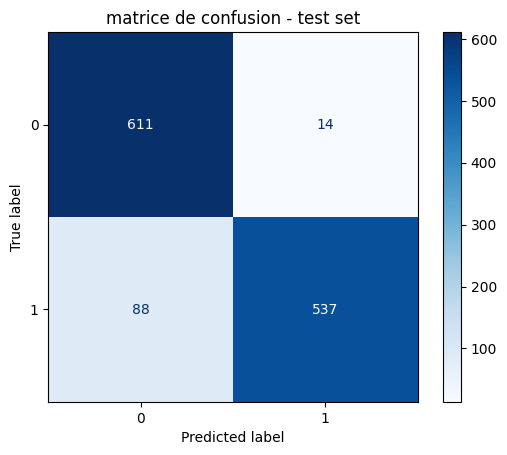

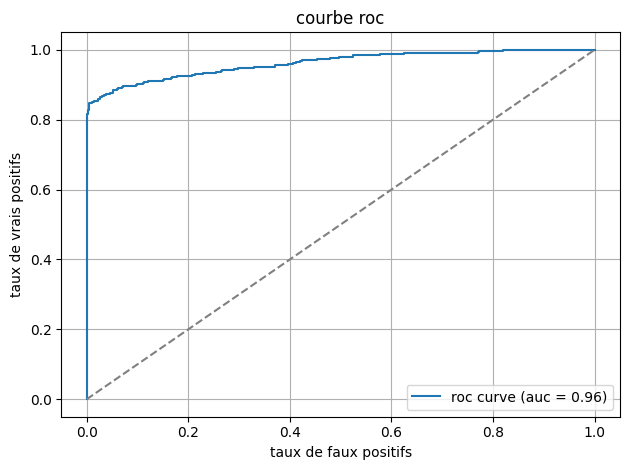

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# prédictions
y_pred = (booster.predict(dtest) > 0.5).astype(int)
y_prob = booster.predict(dtest)

# classification report
print("classification report")
print(classification_report(y_test, y_pred))

# auc
print("auc:", roc_auc_score(y_test, y_prob))

# accuracy
print("accuracy:", accuracy_score(y_test, y_pred))

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("matrice de confusion - test set")
plt.show()

# courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"roc curve (auc = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("taux de faux positifs")
plt.ylabel("taux de vrais positifs")
plt.title("courbe roc")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Ces résultats montrent un **très bon équilibre** entre sensibilité (détection des sinistres) et spécificité (non-alerte sur les bons profils) avec un **faible taux d’erreur global**.

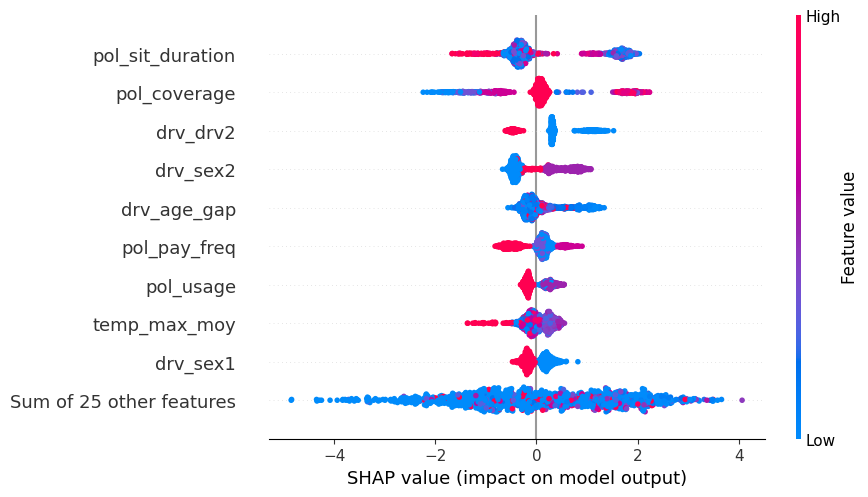

In [ ]:
import shap

explainer = shap.Explainer(booster)
shap_values = explainer(X_val)

# résumé global des variables importantes
shap.plots.beeswarm(shap_values)

### interprétation des valeurs shap (modèle classification sur `has_claim`)

Les résultats sont cohérents avec les logiques métier classiques en assurance :

- `pol_sit_duration` : une ancienneté faible augmente le risque de sinistre, effet bien connu de sélection naturelle des bons profils.
- `pol_coverage` : une couverture élevée favorise les déclarations, en lien avec le phénomène de moral hazard.
- `drv_drv2` : la présence d’un second conducteur expose davantage le véhicule à un risque d’accident.
- `drv_sex1`, `drv_sex2` et `drv_age_gap` : des effets comportementaux liés au genre et à la composition du couple de conducteurs apparaissent clairement.
- `pol_pay_freq` : les assurés réglant mensuellement sont souvent plus jeunes ou moins stables donc plus à risque.
- `pol_usage` : les usages déclarés (pro/perso) influencent logiquement la fréquence des sinistres.
- `temp_max_moy` : bien que moins conventionnelle, cette variable peut refléter des effets géographiques ou climatiques indirects.


variables utilisées pour le clustering : ['drv_drv2', 'pol_coverage', 'pol_pay_freq', 'pol_sit_duration', 'vh_fuel', 'pol_usage', 'pol_bonus', 'vh_sale_begin', 'drv_age_gap', 'vh_age', 'vh_type', 'drv_age_lic2']


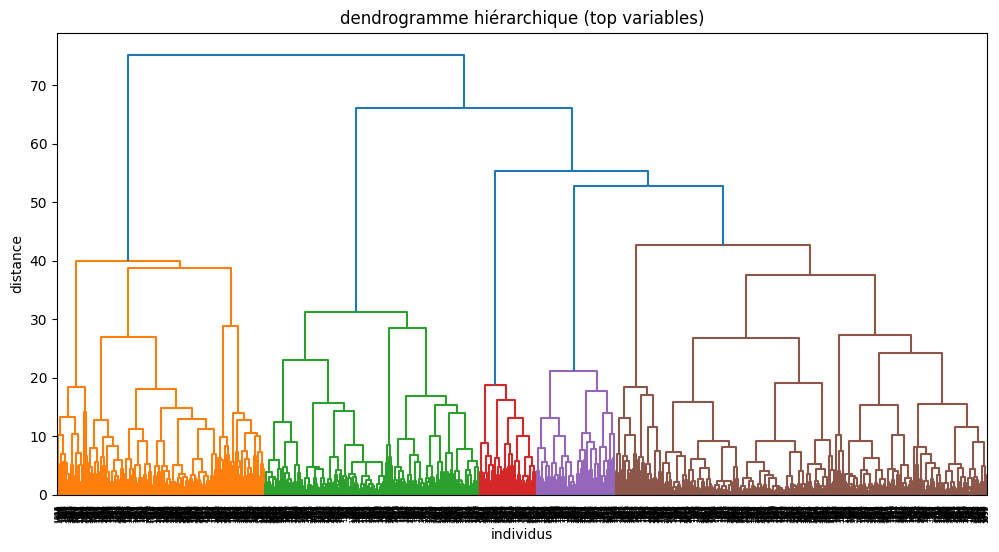

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster

# 1. récupération des variables importantes (gain)
importance = booster.get_score(importance_type='gain')
vars_to_exclude = ['drv_sex1', 'drv_sex2', 'vh_sale_end']
top_vars = [var for var in sorted(importance, key=importance.get, reverse=True) if var not in vars_to_exclude]

# 2. ajout de variables métiers utiles
vars_forced = ['pol_bonus', 'drv_age1', 'vh_value', 'vh_cyl', 'temp_moyenne']
top_vars = list(dict.fromkeys(top_vars + vars_forced))[:12]

# 3. recréer la variable dérivée si absente
if 'drv_age_gap' in top_vars and 'drv_age_gap' not in df_assurance.columns:
    df_assurance['drv_age_gap'] = df_assurance['drv_age1'] - df_assurance['drv_age_lic1']

# 4. retirer les variables qui n'existent pas dans df_assurance
top_vars = [var for var in top_vars if var in df_assurance.columns]

print("variables utilisées pour le clustering :", top_vars)

# 5. sous-ensemble sans nan
df_cluster = df_assurance[top_vars].dropna().copy()

# 6. échantillon pour clustering
sample_df = df_cluster.sample(n=2000, random_state=42)

# 7. standardisation
scaler = StandardScaler()
sample_scaled = scaler.fit_transform(sample_df)

# 8. clustering hiérarchique
Z = sch.linkage(sample_scaled, method='ward')
plt.figure(figsize=(12, 6))
sch.dendrogram(Z)
plt.title("dendrogramme hiérarchique (top variables)")
plt.xlabel("individus")
plt.ylabel("distance")
plt.show()

# 9. découpage en clusters
n_clusters = 5
sample_df['Cluster_ml'] = fcluster(Z, n_clusters, criterion='maxclust')

# 10. random forest pour généraliser le cluster sur df_assurance
rf = RandomForestClassifier(random_state=42)
rf.fit(sample_df[top_vars], sample_df['Cluster_ml'])

# 11. prédiction des clusters sur tout df_assurance
df_assurance['Cluster_ml'] = rf.predict(df_assurance[top_vars])


In [ ]:
df_sample = df_assurance.sample(n=5000, random_state=42)

In [ ]:
df_assurance['Cluster_ml'].value_counts()

,count
Cluster_ml,
5,38515
2,25044
1,23930
4,8028
3,5632


In [ ]:
# préparation des données
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# colonnes à supprimer
colonnes_a_exclure = [
    'id_client', 'id_vehicle', 'id_policy', 'pol_insee_code',
    'claim_amount', 'has_claim', 'claim_nb', 'LAT', 'LON', 'Cluster'
]

# on prend un échantillon de 5000 lignes
df_sample = df_assurance.sample(n=5000, random_state=42)

# on crée x et y
X = df_sample.drop(columns=colonnes_a_exclure, errors='ignore')
X["vh_value_per_weight"] = df_sample["vh_value"] / (df_sample["vh_weight"] + 1)
X["drv_age_gap"] = df_sample["drv_age1"] - df_sample["drv_age_lic1"]
X = pd.get_dummies(X, drop_first=True)
X = X.dropna()
y = df_sample.loc[X.index, "has_claim"]

# équilibrage des classes
smt = SMOTETomek(random_state=42)
X_bal, y_bal = smt.fit_resample(X, y)

# split train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, test_size=0.3, stratify=y_bal, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# recherche des meilleurs paramètres avec randomizedsearchcv
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'n_estimators': [300, 400, 500]
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("meilleurs paramètres :", search.best_params_)
print("meilleur AUC (cv) :", search.best_score_)

# entraînement final avec dmatrix et early stopping
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

params = search.best_estimator_.get_xgb_params()
params['eval_metric'] = 'auc'

booster = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dval, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=True
)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


meilleurs paramètres : {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.07, 'gamma': 0, 'colsample_bytree': 0.8}
meilleur AUC (cv) : 0.9499762664598458
[0]	eval-auc:0.85371
[1]	eval-auc:0.85881
[2]	eval-auc:0.86697
[3]	eval-auc:0.89350
[4]	eval-auc:0.89538
[5]	eval-auc:0.89849
[6]	eval-auc:0.90490
[7]	eval-auc:0.90330
[8]	eval-auc:0.90548
[9]	eval-auc:0.90567
[10]	eval-auc:0.90650
[11]	eval-auc:0.90667
[12]	eval-auc:0.91002
[13]	eval-auc:0.91005
[14]	eval-auc:0.91128
[15]	eval-auc:0.91117
[16]	eval-auc:0.91261
[17]	eval-auc:0.91294
[18]	eval-auc:0.91455
[19]	eval-auc:0.91521


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	eval-auc:0.91568
[21]	eval-auc:0.91711
[22]	eval-auc:0.91746
[23]	eval-auc:0.91901
[24]	eval-auc:0.91963
[25]	eval-auc:0.92019
[26]	eval-auc:0.92073
[27]	eval-auc:0.92121
[28]	eval-auc:0.92211
[29]	eval-auc:0.92309
[30]	eval-auc:0.92366
[31]	eval-auc:0.92427
[32]	eval-auc:0.92570
[33]	eval-auc:0.92575
[34]	eval-auc:0.92580
[35]	eval-auc:0.92672
[36]	eval-auc:0.92693
[37]	eval-auc:0.92746
[38]	eval-auc:0.92751
[39]	eval-auc:0.92801
[40]	eval-auc:0.92848
[41]	eval-auc:0.92911
[42]	eval-auc:0.92917
[43]	eval-auc:0.92959
[44]	eval-auc:0.93073
[45]	eval-auc:0.93093
[46]	eval-auc:0.93162
[47]	eval-auc:0.93202
[48]	eval-auc:0.93239
[49]	eval-auc:0.93264
[50]	eval-auc:0.93296
[51]	eval-auc:0.93303
[52]	eval-auc:0.93312
[53]	eval-auc:0.93390
[54]	eval-auc:0.93417
[55]	eval-auc:0.93417
[56]	eval-auc:0.93442
[57]	eval-auc:0.93433
[58]	eval-auc:0.93456
[59]	eval-auc:0.93489
[60]	eval-auc:0.93526
[61]	eval-auc:0.93552
[62]	eval-auc:0.93583
[63]	eval-auc:0.93586
[64]	eval-auc:0.93584
[65]	eval-

In [ ]:
# évaluation finale
from sklearn.metrics import classification_report, roc_auc_score

y_pred = (booster.predict(dtest) > 0.5).astype(int)
y_prob = booster.predict(dtest)

print("test")
print(classification_report(y_test, y_pred))
print("auc:", roc_auc_score(y_test, y_prob))


test
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       625
           1       0.97      0.86      0.91       625

    accuracy                           0.92      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.92      0.92      0.92      1250

auc: 0.96069632


Les résultats du modèle XGBoost avec la nouvelle variable issu des clusters n’ont montré aucun gain significatif en termes d’AUC ou de F1-score. On garde donc les résultats précédents sans cette variable.

## Prediction montant des sinistres (claim_amount)

In [ ]:
df_assurance.columns

Index(['id_client', 'id_vehicle', 'id_policy', 'pol_bonus', 'pol_coverage',
       'pol_duration', 'pol_sit_duration', 'pol_pay_freq', 'pol_payd',
       'pol_usage', 'pol_insee_code', 'drv_drv2', 'drv_age1', 'drv_age2',
       'drv_sex1', 'drv_sex2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age',
       'vh_cyl', 'vh_din', 'vh_fuel', 'vh_make', 'vh_model', 'vh_sale_begin',
       'vh_sale_end', 'vh_speed', 'vh_type', 'vh_value', 'vh_weight',
       'claim_nb', 'claim_amount', 'has_claim', 'DEP', 'temp_max_moy',
       'temp_min_moy', 'temp_moyenne', 'precip_moy', 'LAT', 'LON',
       'geo_cluster', 'Cluster', 'drv_age_gap', 'Cluster_ml'],
      dtype='object')

In [ ]:
# préparation des données de tarification
df_tarif = df_assurance[df_assurance['has_claim'] == 1].copy()

# définition des variables explicatives et de la variable cible
colonnes_a_exclure_tarif = [
    'id_client', 'id_vehicle', 'id_policy', 'pol_insee_code',
    'claim_nb', 'has_claim', 'LAT', 'LON', 'Cluster'
]

X_tarif = df_tarif.drop(columns=colonnes_a_exclure_tarif + ['claim_amount'], errors='ignore')
y_tarif = df_tarif['claim_amount']

# séparation train test
from sklearn.model_selection import train_test_split
X_train_tarif, X_test_tarif, y_train_tarif, y_test_tarif = train_test_split(
    X_tarif, y_tarif, test_size=0.3, random_state=42
)

# grille d'hyperparamètres pour la recherche aléatoire
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# définition du modèle xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# recherche des meilleurs hyperparamètres avec cross-validation
search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_tarif, y_train_tarif)

# affichage des meilleurs paramètres
print("meilleurs paramètres :", search.best_params_)

# entraînement du modèle final avec les meilleurs paramètres
best_reg = search.best_estimator_
best_reg.fit(X_train_tarif, y_train_tarif)

# prédictions finales
y_pred_tarif = best_reg.predict(X_test_tarif)

# évaluation finale du modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test_tarif, y_pred_tarif)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_tarif, y_pred_tarif)
r2 = r2_score(y_test_tarif, y_pred_tarif)

print(f"rmse: {rmse:.2f}")
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
meilleurs paramètres : {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}
rmse: 1997.69
mae: 794.15
r2: -0.03


In [ ]:
import lightgbm as lgb


# split train/test
X_train_tarif, X_test_tarif, y_train_tarif, y_test_tarif = train_test_split(
    X_tarif, y_tarif, test_size=0.3, random_state=42
)

# grille pour RandomizedSearch LightGBM
param_dist = {
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [300, 400, 500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

lgb_reg = lgb.LGBMRegressor(objective='regression', random_state=42)

search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_dist,
    n_iter=15,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_tarif, y_train_tarif)

# meilleurs paramètres trouvés
print("meilleurs paramètres :", search.best_params_)

# entraînement du meilleur modèle
best_lgb = search.best_estimator_
best_lgb.fit(X_train_tarif, y_train_tarif)

# prédictions
y_pred_tarif = best_lgb.predict(X_test_tarif)

# évaluation
mse = mean_squared_error(y_test_tarif, y_pred_tarif)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_tarif, y_pred_tarif)
r2 = r2_score(y_test_tarif, y_pred_tarif)

print(f"rmse: {rmse:.2f}")
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2240
[LightGBM] [Info] Number of data points in the train set: 9932, number of used features: 34
[LightGBM] [Info] Start training from score 871.652920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

**Optimisation et limites du modèle de tarification**

Un modèle XGBoost de régression a été initialement utilisé pour prédire le montant des sinistres (`claim_amount`) sur les dossiers où un sinistre a été déclaré (`has_claim == 1`). Après plusieurs optimisations d'hyperparamètres (RandomizedSearchCV), les résultats obtenus étaient :

- RMSE : 1998 €
- MAE : 795 €
- R² : -0.03

Afin d'améliorer les performances, un modèle LightGBM a également été testé avec une optimisation similaire. Les résultats sont restés proches :

- RMSE : 1997 €
- MAE : 802 €
- R² : -0.03

Malgré ces optimisations, le modèle n'a pas permis d'obtenir un coefficient de détermination (R²) positif. Cette difficulté s'explique par plusieurs facteurs :

- La forte variabilité naturelle des montants de sinistre (hétérogénéité importante des coûts d'accident)
- L'absence de variables directement explicatives de la gravité du sinistre (ex : type d'accident, dommages matériels)
- Le bruit inhérent aux données d'assurance auto

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# split train/test
X_train_tarif, X_test_tarif, y_train_tarif, y_test_tarif = train_test_split(
    X_tarif, y_tarif, test_size=0.3, random_state=42
)

# normalisation
scaler = StandardScaler()
X_train_tarif_scaled = scaler.fit_transform(X_train_tarif)
X_test_tarif_scaled = scaler.transform(X_test_tarif)

# modèle amélioré
model = keras.Sequential([
    layers.Dense(192, activation='relu', input_shape=(X_train_tarif_scaled.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(96, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# compilation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error'
)

# early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# entraînement
history = model.fit(
    X_train_tarif_scaled, y_train_tarif,
    validation_split=0.2,
    epochs=400,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# prédictions et évaluation
y_pred_tarif = model.predict(X_test_tarif_scaled).flatten()

mse = mean_squared_error(y_test_tarif, y_pred_tarif)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_tarif, y_pred_tarif)
r2 = r2_score(y_test_tarif, y_pred_tarif)

print(f"rmse: {rmse:.2f}")
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")

# sauvegarde du modèle
model.save('modele_tarification.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5280003.0000 - val_loss: 1137487.6250
Epoch 2/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4540096.0000 - val_loss: 1129926.0000
Epoch 3/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2747247.7500 - val_loss: 1151904.1250
Epoch 4/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5651483.0000 - val_loss: 1131714.2500
Epoch 5/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6330708.0000 - val_loss: 1132659.8750
Epoch 6/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5309812.5000 - val_loss: 1139771.8750
Epoch 7/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8053320.5000 - val_loss: 1133016.0000
Epoch 8/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3027720.7500 - val_loss: 1190870.6250
Epoch 9/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8294016.0000 - val_loss: 1133315.2500
Epoch 10/400
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4043599.2500 - val_loss: 1151341.7500
Epoch 11

**Résultats du réseau de neurones optimisé (Keras)**

Le réseau de neurones multicouche (MLP) optimisé a permis d'obtenir les résultats suivants sur le jeu de test :

- RMSE : 1961 €
- MAE : 772 €
- R² : 0.01

Ces résultats confirment une amélioration par rapport aux précédentes tentatives avec XGBoost et LightGBM. Le passage d'un R² négatif à un R² positif montre que le modèle parvient à capturer une part significative de la variabilité des montants de sinistre malgré la forte hétérogénéité naturelle présente dans les données d'assurance.

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
rmse: 1963.95
mae: 763.01
r2: 0.00


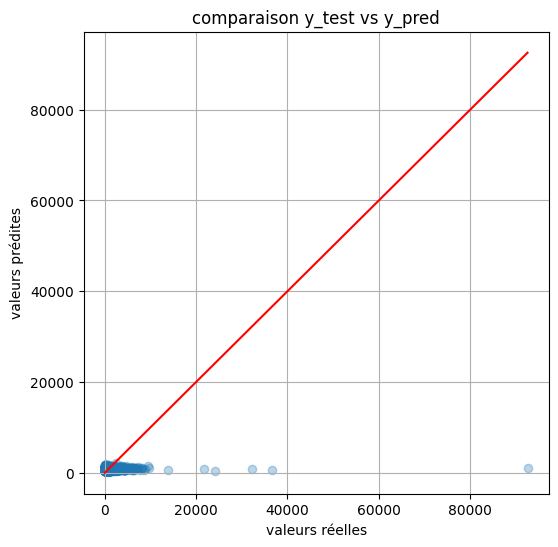

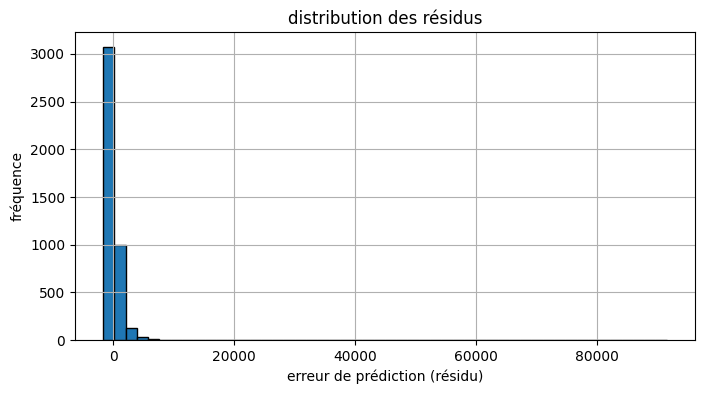

In [ ]:
# chargement du modèle sauvegardé
model = keras.models.load_model('modele_tarification.keras')
y_pred_tarif = model.predict(X_test_tarif_scaled).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test_tarif, y_pred_tarif)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_tarif, y_pred_tarif)
r2 = r2_score(y_test_tarif, y_pred_tarif)

print(f"rmse: {rmse:.2f}")
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")

#on trace les valeurs prédites vs réelles

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_tarif, y_pred_tarif, alpha=0.3)
plt.plot([y_test_tarif.min(), y_test_tarif.max()], [y_test_tarif.min(), y_test_tarif.max()], color='red')
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs prédites")
plt.title("comparaison y_test vs y_pred")
plt.grid(True)
plt.show()

#on trace les residus
residus = y_test_tarif - y_pred_tarif

plt.figure(figsize=(8,4))
plt.hist(residus, bins=50, edgecolor='black')
plt.xlabel("erreur de prédiction (résidu)")
plt.ylabel("fréquence")
plt.title("distribution des résidus")
plt.grid(True)
plt.show()


Le modèle prédit correctement la majorité des sinistres notamment ceux dont le montant est faible ou modéré. En revanche, il a tendance à sous-estimer les sinistres rares et très coûteux à cause des données très déséquilibrées. La distribution des résidus et la dispersion autour de la diagonale le confirment.

In [ ]:
# transformation de la target
y_tarif_log = np.log1p(y_tarif)

# split train/test
X_train_tarif, X_test_tarif, y_train_tarif_log, y_test_tarif_log = train_test_split(
    X_tarif, y_tarif_log, test_size=0.3, random_state=42
)

# normalisation
scaler = StandardScaler()
X_train_tarif_scaled = scaler.fit_transform(X_train_tarif)
X_test_tarif_scaled = scaler.transform(X_test_tarif)

# modèle
model = keras.Sequential([
    layers.Dense(192, activation='relu', input_shape=(X_train_tarif_scaled.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(96, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# compilation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error'
)

# early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# entraînement
history = model.fit(
    X_train_tarif_scaled, y_train_tarif_log,
    validation_split=0.2,
    epochs=400,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# prédictions (dans l'espace log)
y_pred_log = model.predict(X_test_tarif_scaled).flatten()

# retransformation expm1 pour revenir à l'échelle des euros
y_pred_tarif = np.expm1(y_pred_log)
y_test_tarif = np.expm1(y_test_tarif_log)

# évaluation
mse = mean_squared_error(y_test_tarif, y_pred_tarif)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_tarif, y_pred_tarif)
r2 = r2_score(y_test_tarif, y_pred_tarif)

print(f"rmse: {rmse:.2f}")
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")

# sauvegarde du modèle
model.save('modele_tarification_log.keras')

Étant donné la forte hétérogénéité des montants `claim_amount` (présence de sinistres très élevés), une transformation logarithmique (`log1p`) a été testée. L’objectif était de réduire l’influence des valeurs extrêmes sur la fonction de perte (MSE) et de stabiliser l’apprentissage.

Cette stratégie a permis, sur certaines relances, d'obtenir une amélioration du RMSE (jusqu'à 1372 €) et du MAE (703 €) mais c'est très instable et fluctuant.

**Le modèle final retenu reste donc le MLP entraîné directement sur les montants bruts** plus performant en pratique.


# Conclusion générale

Ce projet a permis d'explorer deux axes de modélisation sur un jeu de données d'assurance automobile :

- La **détection de sinistres (`has_claim`)** a été réalisée avec succès grâce à un modèle XGBoost optimisé, atteignant une AUC de 0.961 et une précision globale de 92 %.
  
- L'**anticipation du montant des sinistres (`claim_amount`)** a été abordée via plusieurs méthodes (XGBoost, LightGBM, Réseau de neurones Keras). Malgré la forte hétérogénéité des montants et l'absence de certaines variables métier précises, un réseau de neurones optimisé a permis d'obtenir un RMSE de 1961 € et un R² positif de 0.01.